# Importing libraries

In [96]:
import pandas as pd;                        # allows importing data from various file formats & data manipulation operations

import numpy as np;                         # provides support for multi-dimensional arrays.

import numba as nb;                         # just-in-time compiler for Python

import seaborn as sbn;                      # used for making statistical graphics & data viszltion lib built on top of matplotlib

import matplotlib.pyplot as plt;            # creates a figure,creates plotting area in a figure,plots lines in a plotting area

# Displays output inline
%matplotlib inline       

import warnings;
# Never display warnings
warnings.filterwarnings('ignore')

In [97]:
#Reading Dataset using pandas library
data = pd.read_csv('Students_dataset.csv')

In [98]:
#display first 15 rows from the dataset
data.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,ug degree,standard,none,72,72,74
1,female,group C,diplamo,standard,completed,69,90,88
2,female,group B,doctorate,standard,none,90,95,93
3,male,group A,pg degree,free/reduced,none,47,57,44
4,male,group C,diplamo,standard,none,76,78,75
5,female,group B,pg degree,standard,none,71,83,78
6,female,group B,diplamo,standard,completed,88,95,92
7,male,group B,diplamo,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [99]:
#shows no of rows , columns  in dataset
data.shape

(1000, 8)

In [100]:
# replacing space with underscore for easy access of columns
data.columns = data.columns.str.replace(' ','_')

In [101]:
# displays columns names
data.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [102]:
# check for null values
# isna() is used to detect missing values
data.isna().sum()        # returns the number of missing values in each columns

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Plotting with Single Feature

<AxesSubplot:xlabel='gender', ylabel='count'>

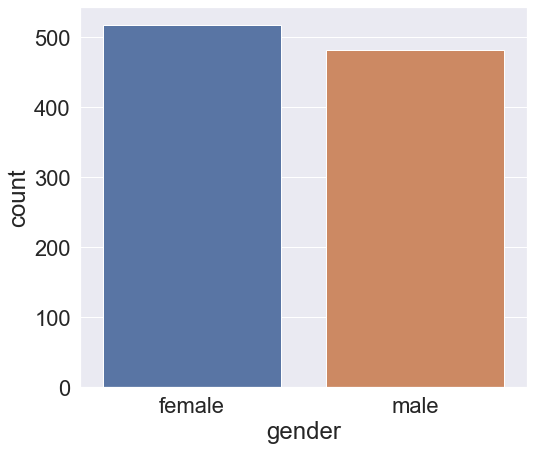

In [103]:
#setting up fontsize,plotsize, etc..
sbn.set(font_scale=2)
plt.figure(figsize=(8,7))
sbn.countplot(x='gender',data=data)

The dataset contains more no of female than male 

# Quantity and ratio

In [104]:
# Displays counts of male and female
print(data.gender.value_counts())
print('``````````````````````````````````````')
print(data.gender.value_counts(normalize = True))

female    518
male      482
Name: gender, dtype: int64
``````````````````````````````````````
female    0.518
male      0.482
Name: gender, dtype: float64


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

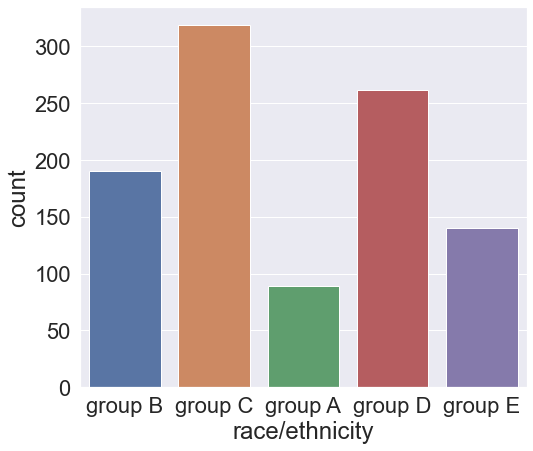

In [105]:
sbn.set(font_scale=2)
plt.figure(figsize=(8,7))
sbn.countplot(x='race/ethnicity', data=data)

"group C" contains more no. of observations in our dataset

<AxesSubplot:xlabel='parental_level_of_education', ylabel='count'>

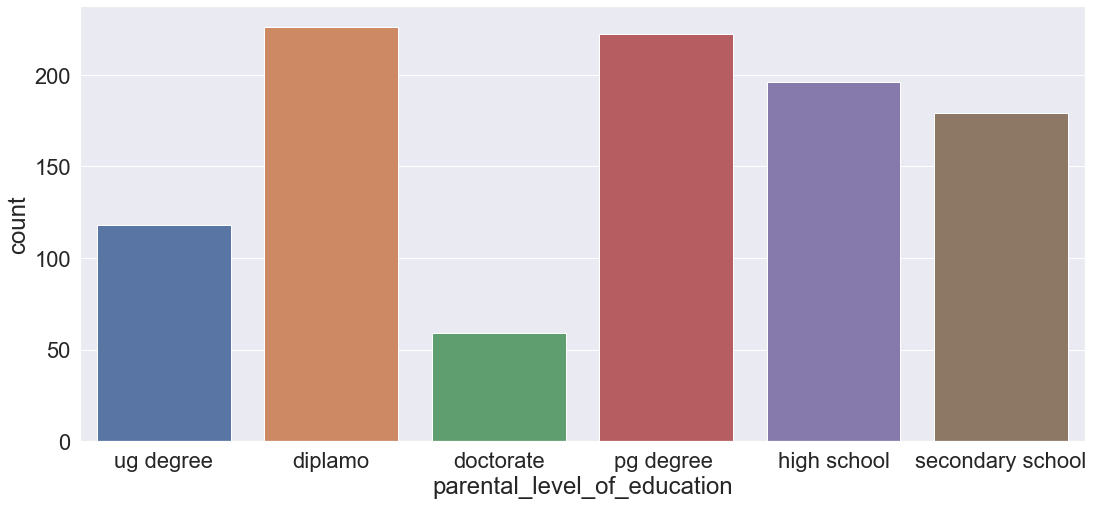

In [106]:
sbn.set(font_scale=2)
plt.figure(figsize=(18,8))
sbn.countplot(x='parental_level_of_education', data=data)

<AxesSubplot:xlabel='lunch', ylabel='count'>

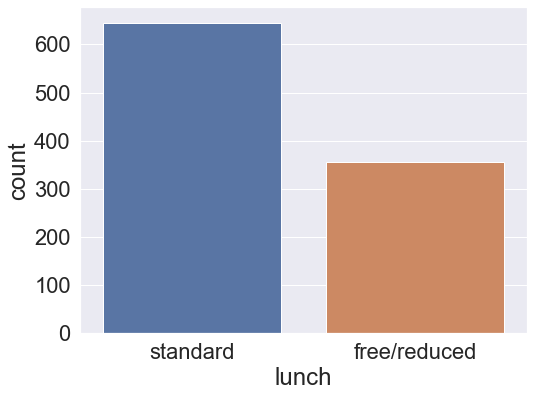

In [107]:
sbn.set(font_scale=2)
plt.figure(figsize=(8,6))
sbn.countplot(x='lunch',data=data)

<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

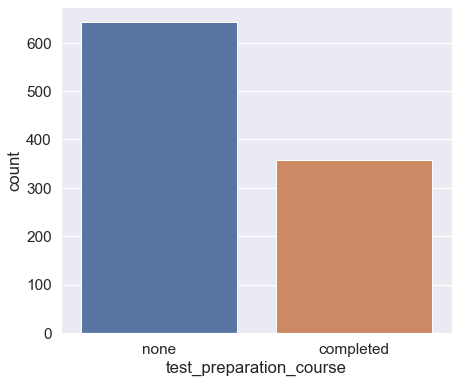

In [108]:
sbn.set(font_scale=1.4)
plt.figure(figsize=(7,6))
sbn.countplot(x='test_preparation_course',data=data)

# Plotting with Two Feature

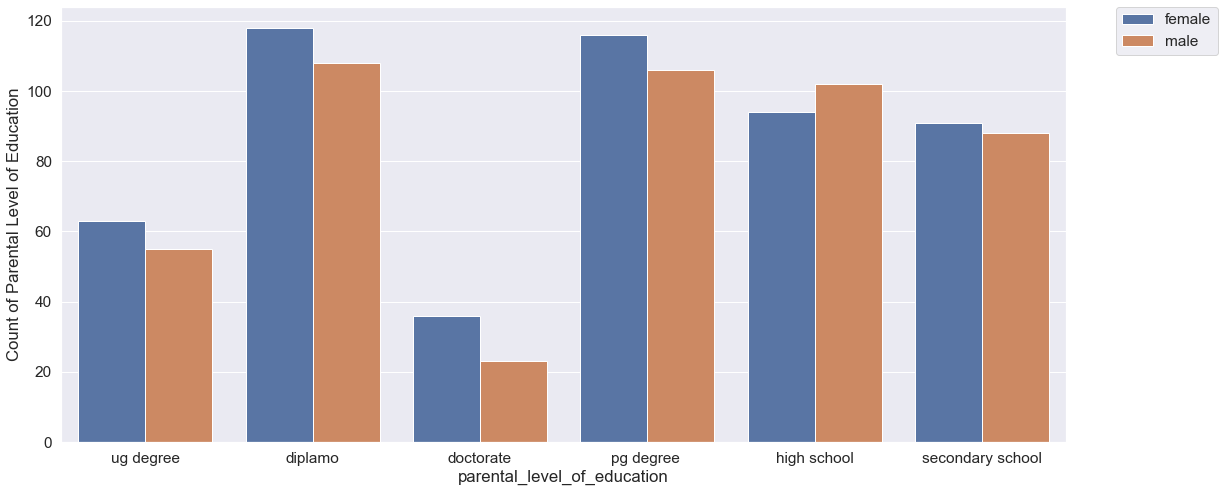

In [109]:
plt.figure(figsize=(18,8))
sbn.countplot(x="parental_level_of_education",hue="gender",data=data)
plt.ylabel('Count of Parental Level of Education')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

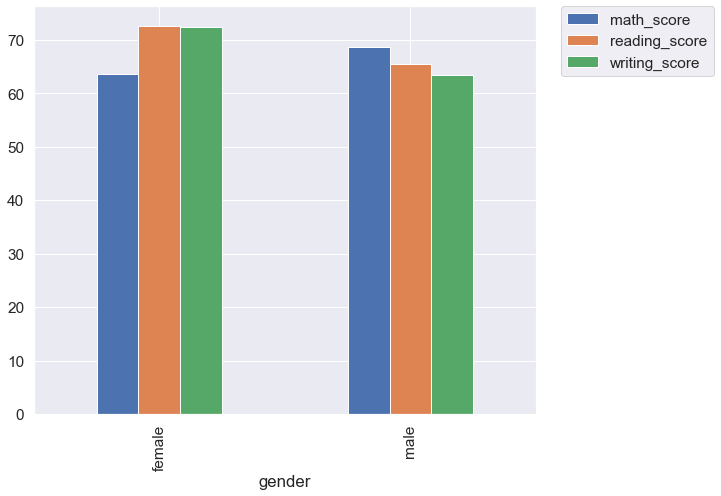

In [110]:
data.groupby('gender').agg('mean').plot(kind='bar',figsize=(9,7.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

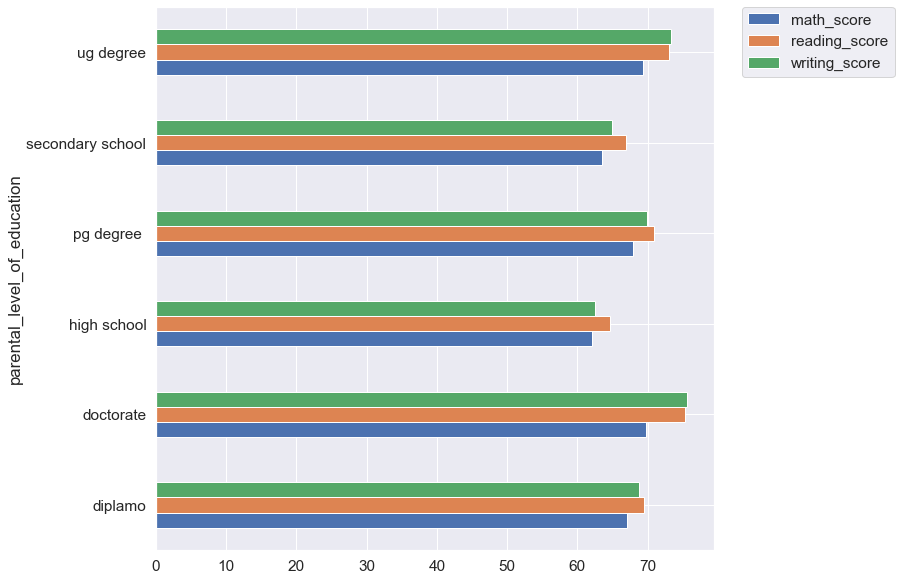

In [111]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

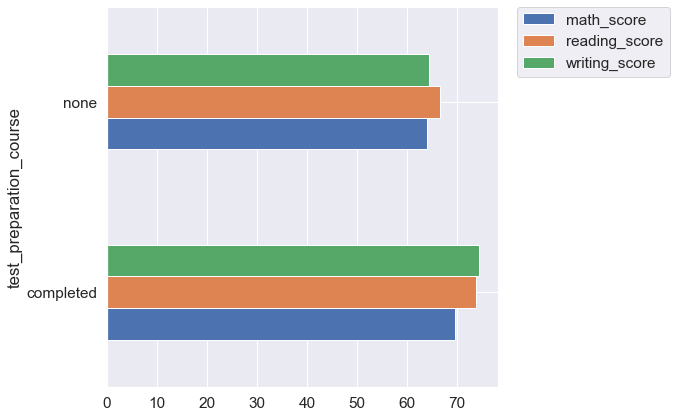

In [112]:
data.groupby('test_preparation_course').agg('mean').plot(kind='barh',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

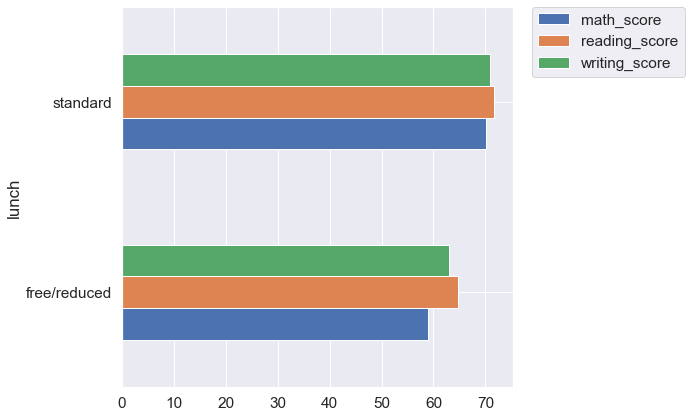

In [113]:
data.groupby('lunch').agg('mean').plot(kind='barh',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

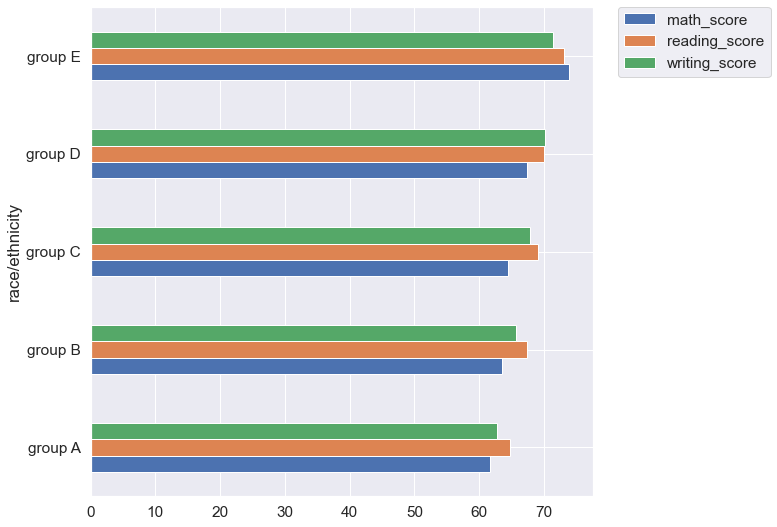

In [114]:
data.groupby('race/ethnicity').agg('mean').plot(kind='barh',figsize=(9,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

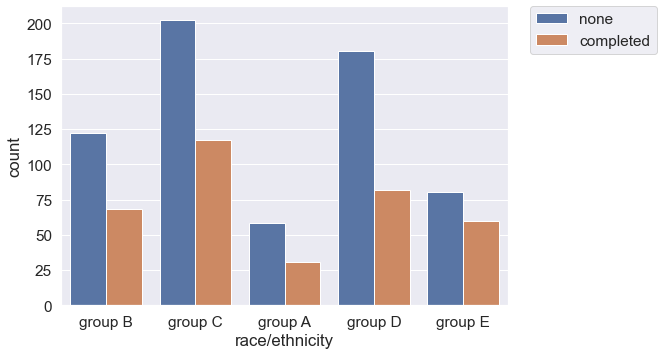

In [115]:
plt.figure(figsize=(8,5.5))
sbn.countplot(x='race/ethnicity',hue='test_preparation_course',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

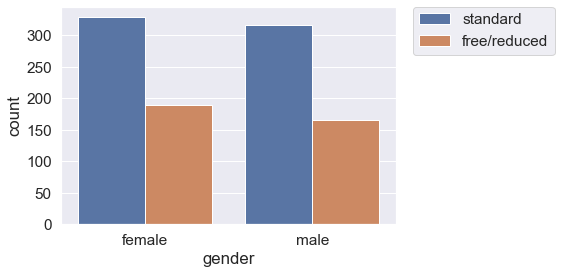

In [116]:
sbn.countplot(x='gender',hue='lunch',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

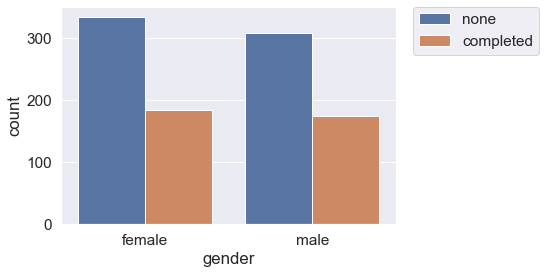

In [117]:
sbn.countplot(x='gender',hue='test_preparation_course',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plotting with multiple features

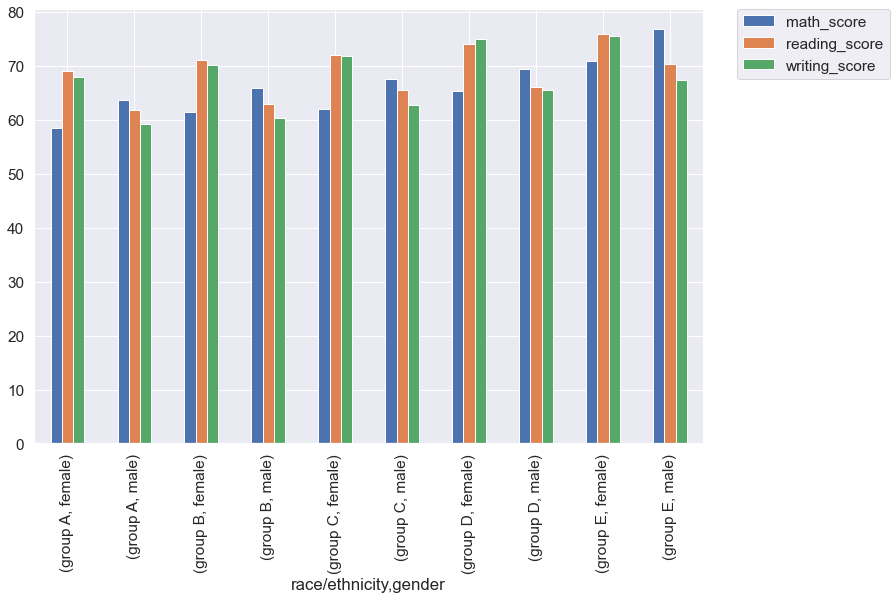

In [118]:
data.groupby(['race/ethnicity','gender']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

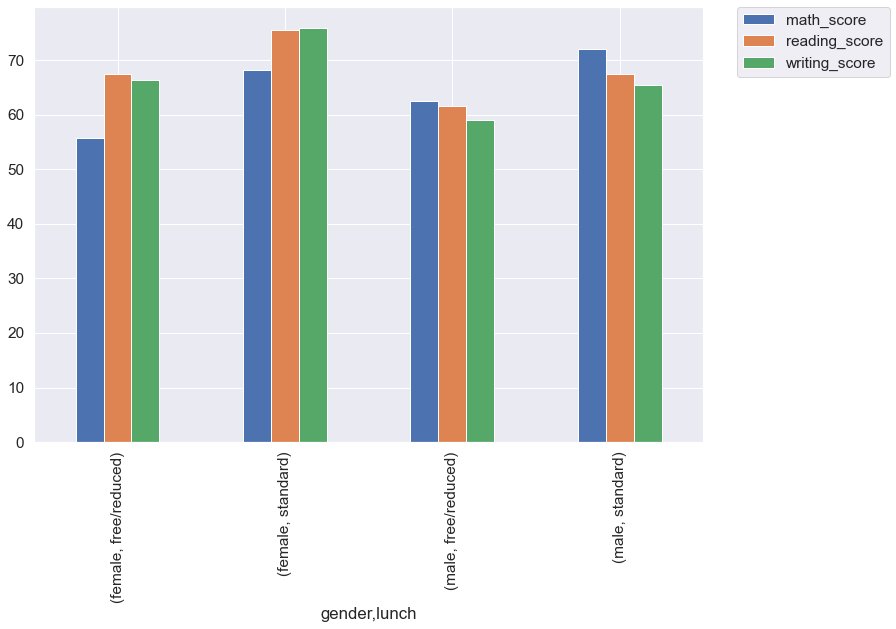

In [119]:
data.groupby(['gender','lunch']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

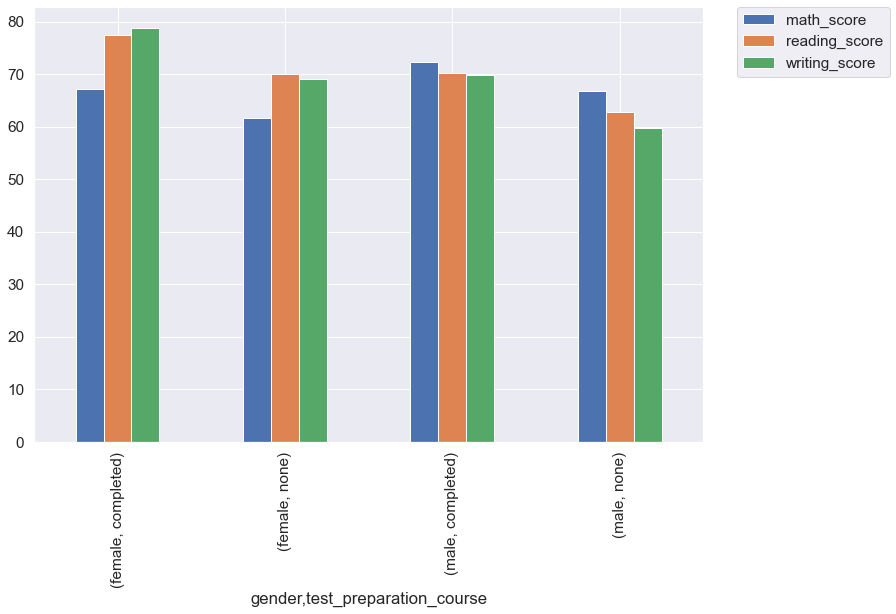

In [120]:
data.groupby(['gender','test_preparation_course']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

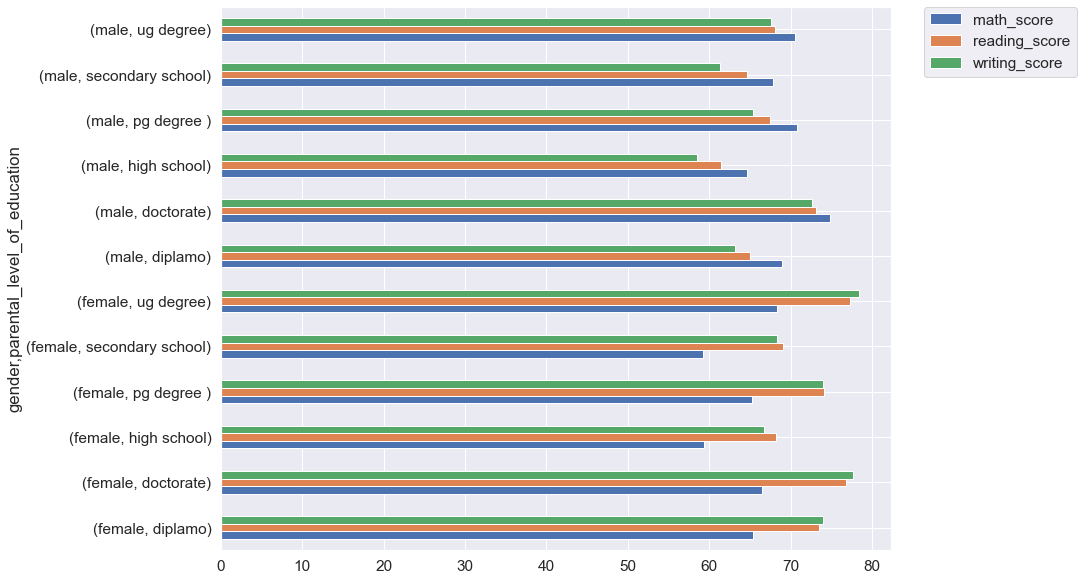

In [121]:
data.groupby(['gender','parental_level_of_education']).agg('mean').plot(kind='barh',figsize=(12,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

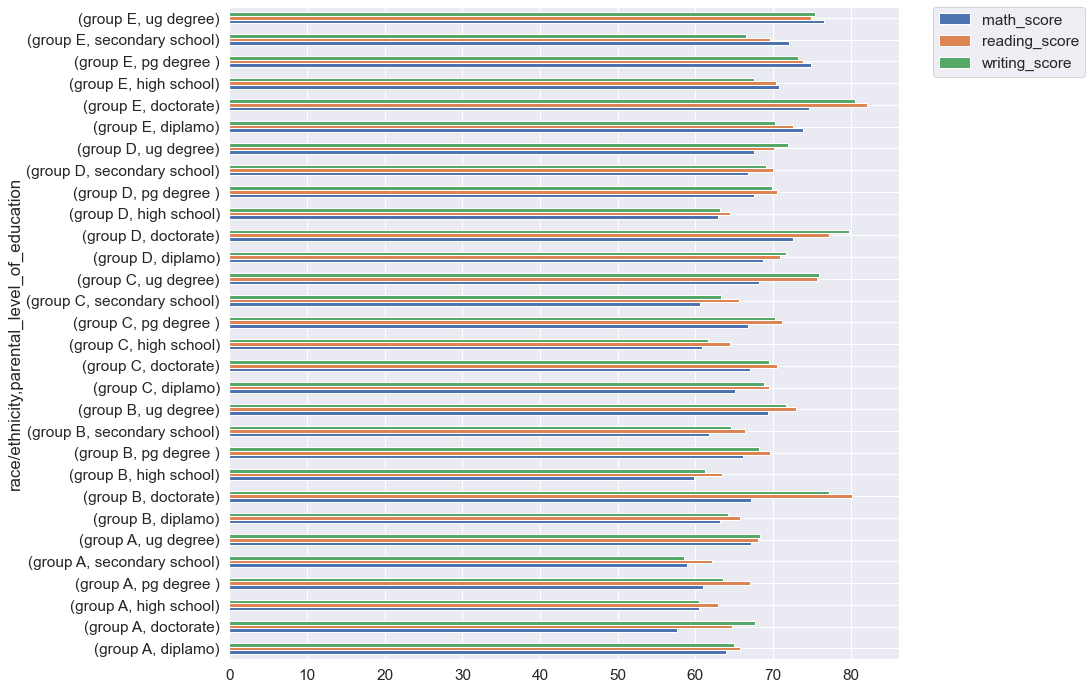

In [122]:
data.groupby(['race/ethnicity','parental_level_of_education']).agg('mean').plot(kind='barh',figsize=(12,12))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)